In [3]:
from data_master import DataMaster
from data_master import DataMaster
import pandas as pd
import numpy as np
from tqdm import tqdm
import datetime
master = DataMaster()
from scipy.stats import norm
from utils.func import *
from utils import universe_selection


In [4]:
SP500_presence = universe_selection.get_index_components_history('SPX','2008-01-01')

 50%|█████     | 2004/3982 [15:51<10:45:49, 19.59s/it]

2015-09-04 00:00:00


100%|██████████| 3982/3982 [1:12:46<00:00,  1.10s/it] 


In [8]:
P = pd.concat(SP500_presence,axis=0)['Presence']
P = P[~P.index.duplicated(keep='last')]
P = P.unstack().fillna(False)
P.index = pd.to_datetime(P.index).date
P = P.reindex(pd.date_range(start=P.index[0],end =datetime.date.today(),freq='B'))
P = P.ffill()
tickers = P.columns.tolist()

In [9]:
P

Ticker,3M Company,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABI,ABK,...,Yum! Brands Inc,ZBH,ZBRA,ZION,ZMH,ZTS,Zimmer Holdings,Zions Bancorp,"[Lua error in Module:Stock_tickers/NYSE at line 28: bad argument #1 to 'upper' (string expected, got nil). ]",eBay Inc.
2008-01-01,False,True,True,False,False,True,False,True,True,True,...,False,False,False,True,True,False,False,False,False,False
2008-01-02,False,True,True,False,False,True,False,True,True,True,...,False,False,False,True,True,False,False,False,False,False
2008-01-03,False,True,True,False,False,True,False,True,True,True,...,False,False,False,True,True,False,False,False,False,False
2008-01-04,False,True,True,False,False,True,False,True,True,True,...,False,False,False,True,True,False,False,False,False,False
2008-01-07,False,True,True,False,False,True,False,True,True,True,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,False,True,False,True,True,True,True,True,False,False,...,False,True,True,True,False,True,False,False,False,False
2023-04-03,False,True,False,True,True,True,True,True,False,False,...,False,True,True,True,False,True,False,False,False,False
2023-04-04,False,True,False,True,True,True,True,True,False,False,...,False,True,True,True,False,True,False,False,False,False
2023-04-05,False,True,False,True,True,True,True,True,False,False,...,False,True,True,True,False,True,False,False,False,False


In [11]:
tickers = P.columns.tolist()
market_data = aggregate_market_data(tickers,period_start=datetime.date(2008,1,1))
write_to_parquet(market_data,'SP500','mkt_data')


  0%|          | 0/1464 [00:00<?, ?it/s][CRITICAL]-get_ticker_generals FAILED 3M Company
[CRITICAL]-get_ohlcv FAILED 3M Company
[DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/historical-market-cap/AAPL.US?api_token=640aa99a271902.64352462&from=2000-01-01 HTTP/1.1" 200 None
  0%|          | 1/1464 [00:01<38:31,  1.58s/it][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/A.US?api_token=640aa99a271902.64352462&filter=General HTTP/1.1" 200 None
[DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/eod/A.US?api_token=640aa99a271902.64352462&fmt=json&from=2008-01-01&to=2023-04-05 HTTP/1.1" 200 None
[INFO]-successful get_ohlcv but not inserted A
[DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/histori

In [12]:
balance_sheets = aggregate_tickers_balance_sheet(tickers)
write_to_parquet(balance_sheets,'SP500','balance_sheets')

  0%|          | 0/1464 [00:00<?, ?it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/3M%20COMPANY.US?fmt=json&api_token=640aa99a271902.64352462&filter=Financials HTTP/1.1" 404 None
  0%|          | 1/1464 [00:00<10:55,  2.23it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/A.US?fmt=json&api_token=640aa99a271902.64352462&filter=Financials HTTP/1.1" 200 None
  0%|          | 2/1464 [00:01<17:55,  1.36it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/AA.US?fmt=json&api_token=640aa99a271902.64352462&filter=Financials HTTP/1.1" 200 None
  0%|          | 3/1464 [00:01<16:28,  1.48it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/AAL.US?fmt=js

In [13]:
income_statement = aggregate_tickers_income_statement(tickers)
write_to_parquet(income_statement,'SP500','income_statement')

  0%|          | 0/1464 [00:00<?, ?it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/3M%20COMPANY.US?fmt=json&api_token=640aa99a271902.64352462&filter=Financials HTTP/1.1" 404 None
  0%|          | 1/1464 [00:00<11:37,  2.10it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/A.US?fmt=json&api_token=640aa99a271902.64352462&filter=Financials HTTP/1.1" 200 None
  0%|          | 2/1464 [00:01<16:58,  1.44it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/AA.US?fmt=json&api_token=640aa99a271902.64352462&filter=Financials HTTP/1.1" 200 None
  0%|          | 3/1464 [00:01<15:25,  1.58it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/AAL.US?fmt=js

In [14]:
GICS = aggregate_tickers_classifs(tickers)
write_to_parquet(GICS,'SP500','GICS')

  0%|          | 0/1464 [00:00<?, ?it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/3M%20Company.US?api_token=640aa99a271902.64352462&filter=General HTTP/1.1" 404 None
[CRITICAL]-get_ticker_generals FAILED 3M Company
  0%|          | 1/1464 [00:00<12:14,  1.99it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/A.US?api_token=640aa99a271902.64352462&filter=General HTTP/1.1" 200 None
  0%|          | 2/1464 [00:01<13:31,  1.80it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/AA.US?api_token=640aa99a271902.64352462&filter=General HTTP/1.1" 200 None
  0%|          | 3/1464 [00:01<14:43,  1.65it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/

In [15]:
write_to_parquet(P,'SP500','universe_table')

# Reafine universe, based on market cap

In [19]:
market_data = pd.read_parquet('data/SP500/mkt_data.pq')
P = pd.read_parquet('data/SP500/universe_table.pq')
income_statement = pd.read_parquet('data/SP500/income_statement.pq')
balance_sheets = pd.read_parquet('data/SP500/balance_sheets.pq')


In [20]:
shares = balance_sheets['commonStockSharesOutstanding'].unstack()
shares.index = pd.to_datetime(shares.index)
shares= shares.reindex_like(P).ffill().astype(float)
price = market_data['close'].unstack().reindex_like(P)
mkt_cap = (shares* price).shift(1)

In [21]:
mkt_cap = mkt_cap.reindex(pd.date_range(mkt_cap.index[0],mkt_cap.index[-1],freq='B')).ffill(limit=3)
stocks = [ x for x in mkt_cap.columns if len(x)<=5]
mkt_cap = mkt_cap[stocks]
mkt_cap_rank = mkt_cap.rank(1,pct=False,ascending=False)


In [31]:
P = mkt_cap_rank <=700
write_to_parquet(P,'US700','universe_table')

In [32]:
balance_sheets.index = pd.MultiIndex.from_arrays([pd.to_datetime(balance_sheets.index.get_level_values(0)), balance_sheets.index.get_level_values(1)])
write_to_parquet(balance_sheets,'US700','balance_sheets')


In [33]:
income_statement.index = pd.MultiIndex.from_arrays([pd.to_datetime(income_statement.index.get_level_values(0)), income_statement.index.get_level_values(1)])
write_to_parquet(income_statement,'US700','income_statement')

In [34]:
GICS = pd.read_parquet('data/SP500/GICS.pq')
write_to_parquet(GICS,'US700','GICS')

In [35]:
market_data['MktCap']= mkt_cap.stack()
write_to_parquet(market_data,'US700','mkt_data')

<Axes: >

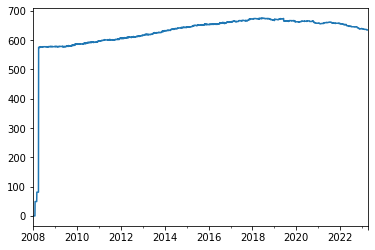

In [38]:
P.sum(1).plot()

In [6]:
def aggregate_tickers_earnings(tickers):
    balance_sheet = {}
    for ticker in tqdm(tickers) :
        try :
            balance_sheet_ticker = master.equities.get_ticker_earnings_history(ticker,'US')
            balance_sheet[ticker] = balance_sheet_ticker
        except :
            balance_sheet = balance_sheet
    balance_sheet = pd.concat(balance_sheet)
    balance_sheet.index.names =['Ticker','Date']
    balance_sheet = balance_sheet .reorder_levels(['Date','Ticker'])

    return balance_sheet
P = pd.read_parquet('data/US/universe_table.pq')
tickers = P.columns.tolist()
earnings = aggregate_tickers_earnings(tickers)

100%|██████████| 904/904 [10:34<00:00,  1.43it/s]


In [8]:
write_to_parquet(earnings,'US','earnings')